# Division del conjunto de datos

En este notebook se muestran algunos de los mecanismos más utilizados para la división del conjunto de datos.

## Conjunto de Datos 

### Descripción
NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set which are mentioned in. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods. Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.

### Ficheros de datos
* <span style="color:green">**KDDTrain+.ARFF**: The full NSL-KDD train set with binary labels in ARFF format</span>
* KDDTrain+.TXT: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format
* KDDTrain+_20Percent.ARFF:	A 20% subset of the KDDTrain+.arff file
* KDDTrain+_20Percent.TXT:	A 20% subset of the KDDTrain+.txt file
* KDDTest+.ARFF:	The full NSL-KDD test set with binary labels in ARFF format
* KDDTest+.TXT:	The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
* KDDTest-21.ARFF:	A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21
* KDDTest-21.TXT:	A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21

### Descarga de los ficheros de datos
https://iscxdownloads.cs.unb.ca/iscxdownloads/NSL-KDD/#NSL-KDD

### Referencias adicionales sobre el conjunto de datos
_M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani, “A Detailed Analysis of the KDD CUP 99 Data Set,” Submitted to Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA), 2009._

## Lectura del Conjunto de Datos

In [2]:
import arff
import pandas as pd 

In [3]:
# Creamos una funcion con el parametro "data_path" para parcear el fichero arf 
def load_kdd_dataset(data_path):
    # Abrir el documento arff y tranformarlo y nombrarlo como el conjunto de entrenamiento "train_set"
    with open(data_path, 'r') as train_set:
        #Creamos la var "dataset" para cargar el archivo arff
        dataset = arff.load(train_set)
    # Se crea un "List Comprehesion"
        # 1. Agregamos el valor "attr" desde el incide 0
        # 2. Creamos un ciclo for donde "el iterador "attr" pase por todos los elementos en "attribute"
    attributes = [attr[0] for attr in dataset["attributes"]]
    # Retornamos un DataFrame de Pandas con los valores de "data" en el archivo arff y los la var "attribute"
    return pd.DataFrame(dataset["data"], columns = attributes)

In [4]:
# Creamos una var "df" donde almacenaremos la funcion(parametro)
df = load_kdd_dataset(r"C:\Users\Martin Farrera\OneDrive\Escri
                      torio\Udemy\ML\Division_de_Datos\NSL-KDD\KDDTrain+.arff")

In [5]:
# Usamos el metodo info() para ver las caracteristicas del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

## Division del Conjunto de Datos

Se debe separar el conjunto de datos en los diferentes subconjuntos necesarios para realizar los procesos de:
- entrenamiento
- validación
- pruebas

Sklearn tiene implementada la función **split_train_test**.

In [6]:
# Desde Sklearn importamos train_test_split
from sklearn.model_selection import train_test_split

# Separamos el conjunto de datos en 60% train_set y 40% para test_set
# Parte 1,  Parte 2                     BD     TAMAÑO       Aleatoriedad
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75583 entries, 98320 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell 

In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50390 entries, 378 to 89600
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50390 non-null  float64
 1   protocol_type                50390 non-null  object 
 2   service                      50390 non-null  object 
 3   flag                         50390 non-null  object 
 4   src_bytes                    50390 non-null  float64
 5   dst_bytes                    50390 non-null  float64
 6   land                         50390 non-null  object 
 7   wrong_fragment               50390 non-null  float64
 8   urgent                       50390 non-null  float64
 9   hot                          50390 non-null  float64
 10  num_failed_logins            50390 non-null  float64
 11  logged_in                    50390 non-null  object 
 12  num_compromised              50390 non-null  float64
 13  root_shell    

In [9]:
# Parte 1,  Parte 2                     BD        TAMAÑO         Aleatoriedad
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [10]:
print("Longitud de Train Set: ", len(train_set))
print("Longitud de Test Sat: ", len(test_set))
print("Longitud de Validacion Set: ", len(val_set))

Longitud de Train Set:  75583
Longitud de Test Sat:  25195
Longitud de Validacion Set:  25195


### Particionado Aleatorio y Stratified Sampling (Parametro: Shuffle)

ADVERTENCIA:

Sklearn tiene implementa la función **train_test_split**, sin embargo, esta función por defecto realiza un particionado del conjunto de datos aleatorio para cada vez que se ejecuta el script. 

Aún añadiendo una semilla fija para generación aleatoria.

-------------

PROBLEMA:

Cada vez que carguemos de nuevo el conjunto de datos se generarán nuevos subconjuntos. Esto puede ocasionar que después de mucho intentos, el algoritmo "vea" todo el conjunto de datos.

-------------

SOLUCIÓN:

Para solucionar este problema, Sklearn ha introducido el parámetro **"shuffle"** en la función **"train_test_split"**.

In [13]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, shuffle=False)

### Particionado Proporcional (Parametro: SRATIFY)

ADVERTENCIA:

Estos métodos para dividir el conjunto de datos estan bien si tienes un conjunto de datos muy grande, pero si no lo tienes, corres el riesgo de introducir **"sampling bias"**.

-------

PROBLEMA:

Sampling Bias: Que al ser aleatorio y uno de los set se quede sin representacion de uno de los valores del atributo y esto haga que no sea preciso en nuevos ejemplares.

-------

EXPLICACIÓN:

El objetivo es que no quede ninguna característica del conjunto de datos sin representación en ninguno de los conjuntos de datos para una o más características en particular.

-------

SOLUCIÓN:

Para evitar esto, se utiliza un metodo de sampling que se llama **"Stratified sampling"**. La población es dividida en subconjuntos homogéneos llamados **"strata"**. 

Sklearn introduce el parámetro **"stratify"** en la función **"train_test_split"** para controlar este comportamiento.

In [14]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, stratify=df["protocol_type"])

## Generacion de una función de Particionado

In [18]:
# Construccion de una funciona que genere el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    # List Comprehesion almacenado en var 
    strat= df[stratify] if stratify else None
    # Partimos el DataSet en Train y test con la funcion()
    train_set, test_set = train_test_split(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    #
    # Aqui se repite el particionado pero de val y test
    strat= test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    # Retorna  train,    val,      test 
    return (train_set, val_set, test_set)

In [19]:
print("Longitud del Conjunto de Datos: ", len(df))

Longitud del Conjunto de Datos:  125973


In [20]:
train_set, val_set, test_set = train_val_test_split(df, stratify='protocol_type')

In [21]:
print("Longitud de Train Set: ", len(train_set))
print("Longitud de Test Sat: ", len(test_set))
print("Longitud de Validacion Set: ", len(val_set))

Longitud de Train Set:  75583
Longitud de Test Sat:  25195
Longitud de Validacion Set:  25195


### Comprobacion del Parametro SRATIFY

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

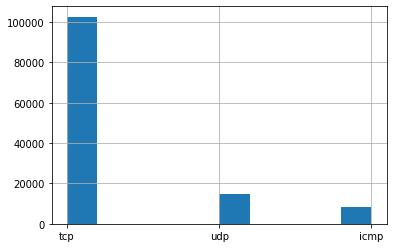

In [24]:
# Desde DataFrame proporcion de datos en el atributo "protocol_type"
df["protocol_type"].hist()

<AxesSubplot:>

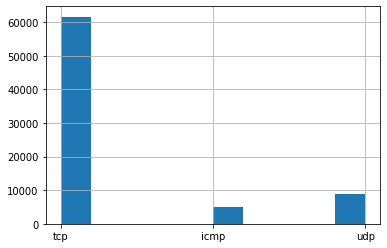

In [25]:
#Desde train_set proporcion de datos en el atributo "protocol_type"
train_set["protocol_type"].hist()

<AxesSubplot:>

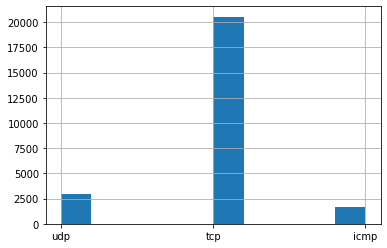

In [26]:
# Desde test_set proporcion de datos en el atributo "protocol_type"
test_set["protocol_type"].hist()

<AxesSubplot:>

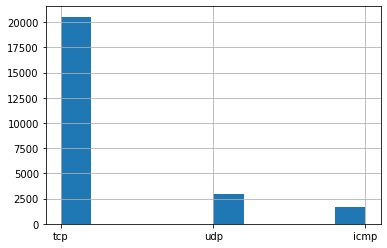

In [27]:
# Desde val_set proporcion de datos en el atributo "protocol_type"
val_set["protocol_type"].hist()